In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Lok+Sabha_2019.csv')

In [3]:
df.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL VOTES,POSTAL VOTES,TOTAL VOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52.00,52,ST,Basic Level,3099414.00,231450.00,376892,482,377374,25.33,35.47,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0.00,54,ST,Post Graduate,18477888.00,847000.00,318665,149,318814,21.40,29.96,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3.00,52,ST,Basic Level,36491000.00,15300000.00,314057,181,314238,21.09,29.53,1489790
3,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5.00,58,SC,Doctorate,74274036.00,8606522.00,644459,2416,646875,33.38,56.46,1937690
4,Uttar Pradesh,AGRA,Manoj Kumar Soni,0,BSP,Elephant,MALE,0.00,47,SC,Post Graduate,133784385.00,22251891.00,434199,1130,435329,22.47,38.00,1937690


In [4]:
df.columns

Index(['STATE', 'CONSTITUENCY', 'NAME', 'WINNER', 'PARTY', 'SYMBOL', 'GENDER',
       'CRIMINAL CASES', 'AGE', 'CATEGORY', 'EDUCATION', 'ASSETS',
       'LIABILITIES', 'GENERAL VOTES', 'POSTAL VOTES', 'TOTAL VOTES',
       'OVER TOTAL ELECTORS IN CONSTITUENCY',
       'OVER TOTAL VOTES POLLED IN CONSTITUENCY', 'TOTAL ELECTORS'],
      dtype='object')

# 1. Which State/UT contributes to the least number of total votes? Which State/UT contributes to the most number of total votes?

In [5]:
res = df.groupby('STATE').sum()['TOTAL VOTES'].sort_values(ascending = True)
res

STATE
Lakshadweep                     46221
Daman & Diu                     85190
Dadra & Nagar Haveli           190366
Andaman & Nicobar Islands      199875
Sikkim                         341973
Chandigarh                     436583
Mizoram                        495137
Arunachal Pradesh              640760
Puducherry                     753862
Goa                            828455
Nagaland                       999673
Meghalaya                     1340215
Manipur                       1598685
Tripura                       2063655
Jammu & Kashmir               3424112
Himachal Pradesh              3727232
Uttarakhand                   4698459
NCT OF Delhi                  8505810
Haryana                      12295211
Chhattisgarh                 12918679
Punjab                       13156797
Jharkhand                    14099959
Assam                        17318218
Telangana                    17826332
Kerala                       20010727
Odisha                       23005065
Gujara

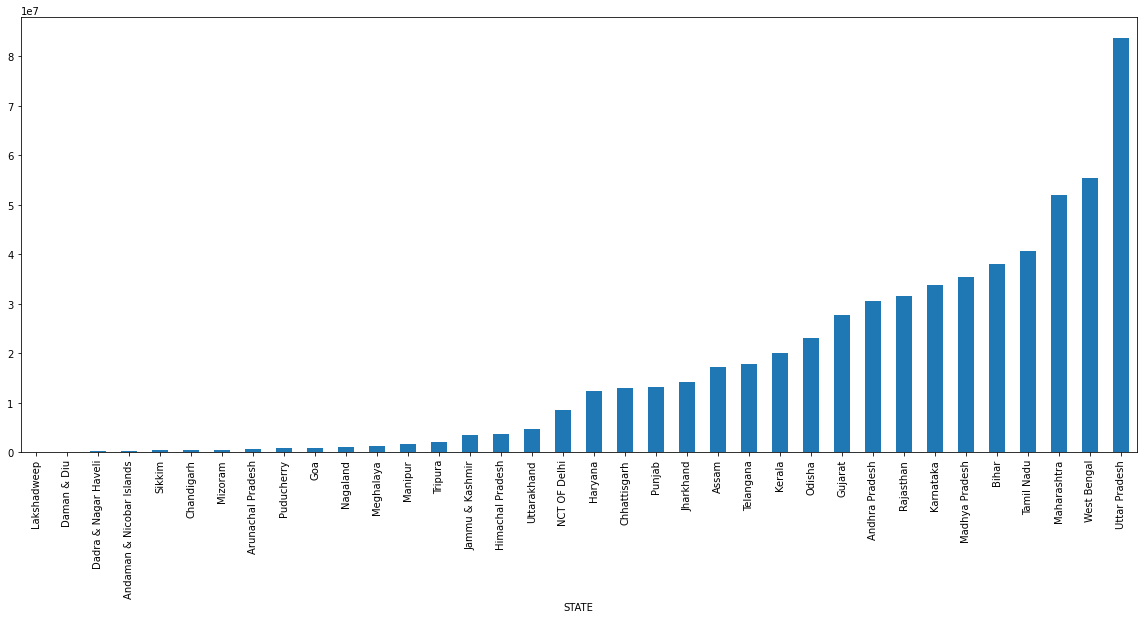

In [6]:
plt.figure(figsize=(20,8))
res.plot(kind = 'bar');

From the bar chart,

1) It’s evident that Uttar Pradesh contributes the most number of total votes - 14.2%, approx. 84 mln votes

2) Lakshadweep contributes the least number of total votes - 0.0078%, approx. 46k votes

# 2. Candidates from which constituency on an average seems to contribute most towards the amount of assets declared? Candidates from which constituency on an average seems to contribute least towards amount of assets declared?

In [7]:
df.groupby('CONSTITUENCY').mean()['ASSETS'].sort_values(ascending = True)

CONSTITUENCY
ALATHUR              2165624.67
VILUPPURAM           3032143.33
GAYA (SC)            3796683.45
ALIPURDUARS          3895905.50
BOLPUR               4090779.40
                       ...     
BANGALORE RURAL   1230421937.67
NELLORE           1289469814.67
GUNA              1296719487.00
CHHINDWARA        1655144708.25
CHEVELLA          3927395902.00
Name: ASSETS, Length: 539, dtype: float64

Candidates from ALATHUR constituency on an average seems to contribute least towards the amount of assets declared with an avg amount of approx. 2.2 mln rupees.

Candidates from CHEVELLA constituency on an average seems to contribute most towards the amount of assets declared with an avg amount of approx. 3.9 bln rupees


# 3. Consider assets and liabilities. Describe and explain both across the Education level? Provide a detailed justification for your answer.

In [8]:
df_asset = df.groupby('EDUCATION')['ASSETS']
df_asset_des = df_asset.describe().T
df_asset_des.loc[('Total'), :] = df_asset.sum()

In [9]:
df_asset_des

EDUCATION,Basic Level,Doctorate,Graduate,Illiterate,Post Graduate
count,588.00,73.00,776.00,55.00,503.00
mean,113087357.14,163789131.21,147467337.18,124500820.24,130823318.28
std,339566599.54,470070948.95,478087455.58,232219087.71,394944020.12
min,565.00,177000.00,0.00,0.00,0.00
25%,3000851.00,9770000.00,9909171.25,7262786.00,7944132.00
50%,14935796.50,18988281.00,33282304.00,28350217.00,27182370.00
75%,65860366.50,74274036.00,115810559.75,116754959.00,92760397.50
max,3418643970.00,2508270292.00,8950179170.00,1197313405.00,4174930444.00
Total,66495365996.00,11956606578.00,114434653649.00,6847545113.00,65804129095.00


From the above table,

On an average, the assets declared by a Doctorate candidate are the highest, whereas, the average assets declared by a candidate with Basic level of education is the lowest.

The highest total amount of assests declared come from Gradute candidates, whereas, the lowest total amount of assests declared come from Illiterate candidates.

Text(0.5, 0, 'Post Graduate')

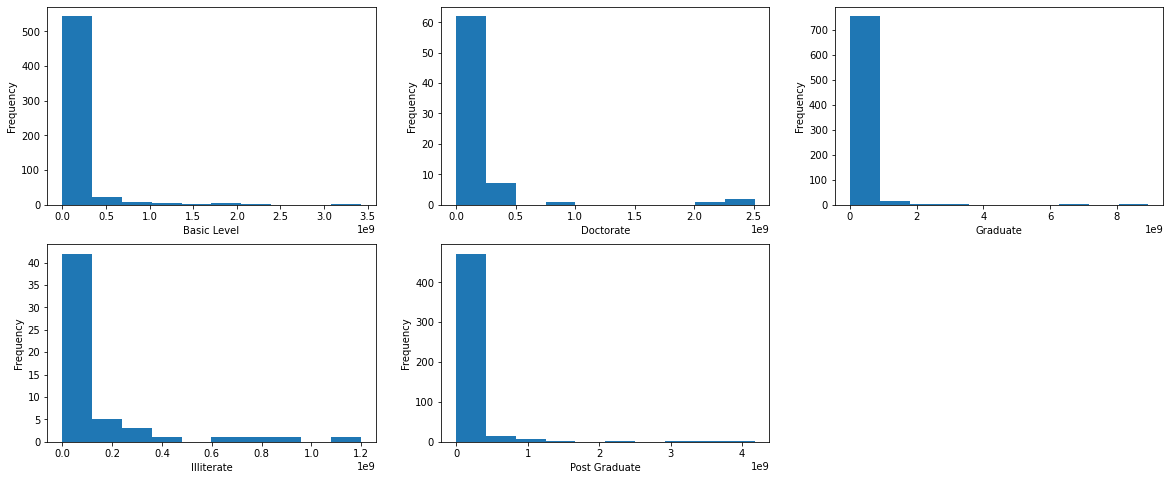

In [10]:
plt.figure(figsize=(20,8))
plt.subplot(2,3,1)
df_asset.get_group('Basic Level').plot(kind = 'hist')
plt.xlabel('Basic Level')
plt.subplot(2,3,2)
df_asset.get_group('Doctorate').plot(kind = 'hist')
plt.xlabel('Doctorate')
plt.subplot(2,3,3)
df_asset.get_group('Graduate').plot(kind = 'hist')
plt.xlabel('Graduate')
plt.subplot(2,3,4)
df_asset.get_group('Illiterate').plot(kind = 'hist')
plt.xlabel('Illiterate')
plt.subplot(2,3,5)
df_asset.get_group('Post Graduate').plot(kind = 'hist')
plt.xlabel('Post Graduate')

From the individual histograms, it shows the assets spread is right skewed and it’s not normal distribution across all education levels.

In [12]:
df_lia = df.groupby('EDUCATION')['LIABILITIES']
df_lia_des = df_lia.describe().T
df_lia_des.loc[('Total'), :] = df_lia.sum()
df_lia_des

EDUCATION,Basic Level,Doctorate,Graduate,Illiterate,Post Graduate
count,588.00,73.00,777.00,55.00,503.00
mean,21598924.78,8972111.25,18852620.89,19511916.51,21383130.71
std,99416300.01,25885435.30,74590853.58,73095280.61,106208631.07
min,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00
50%,500000.00,1127000.00,1387000.00,1935504.00,980000.00
75%,4575793.25,2623964.00,7450651.00,7845260.50,6474886.00
max,1350000000.00,137800000.00,1079582000.00,534644785.00,1547511439.00
Total,12700167770.00,654964121.00,14648486430.00,1073155408.00,10755714746.00


From the above table,

On an average, the liabilities declared by a candidates with Basic level of education are the highest, whereas, the average liabilities declared by Doctorate candidate is the lowest.

The highest total amount of liabilities declared come from Gradute candidates, whereas, the lowest total amount of liabilities declared come from Doctorate candidates.

Text(0.5, 0, 'Post Graduate')

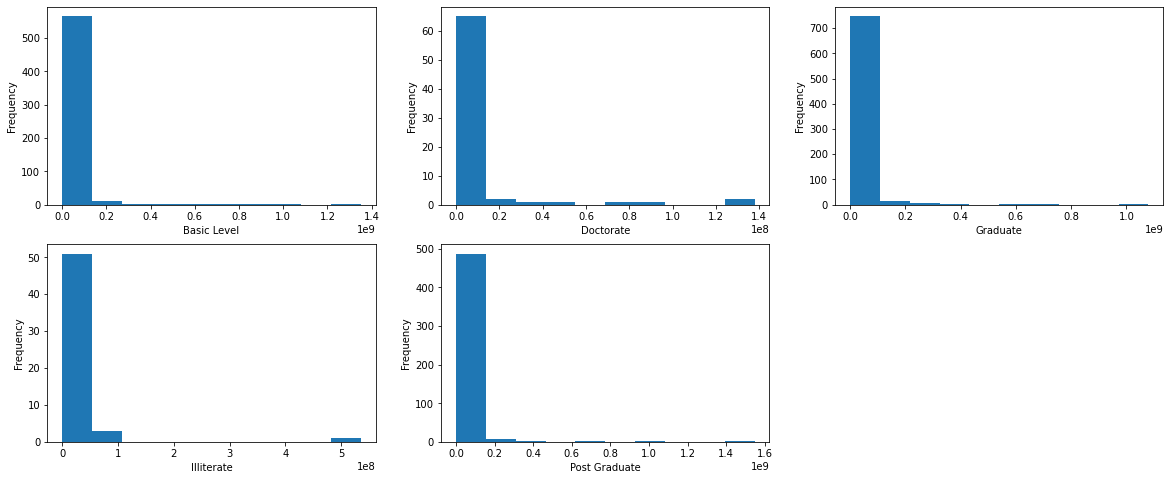

In [13]:
plt.figure(figsize=(20,8))
plt.subplot(2,3,1)
df_lia.get_group('Basic Level').plot(kind = 'hist')
plt.xlabel('Basic Level')
plt.subplot(2,3,2)
df_lia.get_group('Doctorate').plot(kind = 'hist')
plt.xlabel('Doctorate')
plt.subplot(2,3,3)
df_lia.get_group('Graduate').plot(kind = 'hist')
plt.xlabel('Graduate')
plt.subplot(2,3,4)
df_lia.get_group('Illiterate').plot(kind = 'hist')
plt.xlabel('Illiterate')
plt.subplot(2,3,5)
df_lia.get_group('Post Graduate').plot(kind = 'hist')
plt.xlabel('Post Graduate')

From the individual histograms, it shows the liabilities spread is right skewed and it’s not normal distribution across all education levels.

# 4. Are there any outliers in assets and liabilities across Education level? Back up your answer with a suitable plot/technique.

Text(0.5, 0, 'Post Graduate')

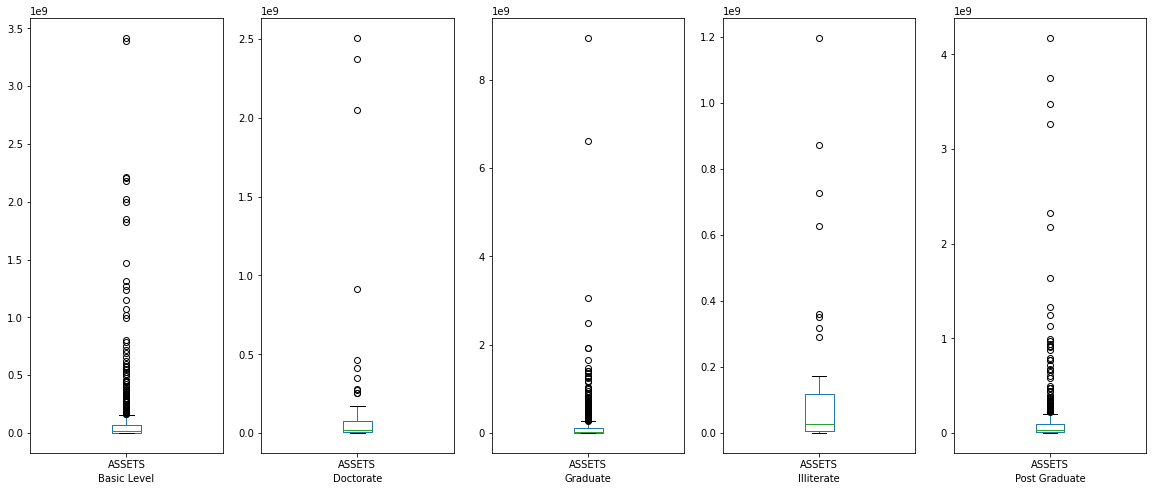

In [14]:
plt.figure(figsize=(20,8))
plt.subplot(1,5,1)
df_asset.get_group('Basic Level').plot(kind = 'box')
plt.xlabel('Basic Level')
plt.subplot(1,5,2)
df_asset.get_group('Doctorate').plot(kind = 'box')
plt.xlabel('Doctorate')
plt.subplot(1,5,3)
df_asset.get_group('Graduate').plot(kind = 'box')
plt.xlabel('Graduate')
plt.subplot(1,5,4)
df_asset.get_group('Illiterate').plot(kind = 'box')
plt.xlabel('Illiterate')
plt.subplot(1,5,5)
df_asset.get_group('Post Graduate').plot(kind = 'box')
plt.xlabel('Post Graduate')

Text(0.5, 0, 'Post Graduate')

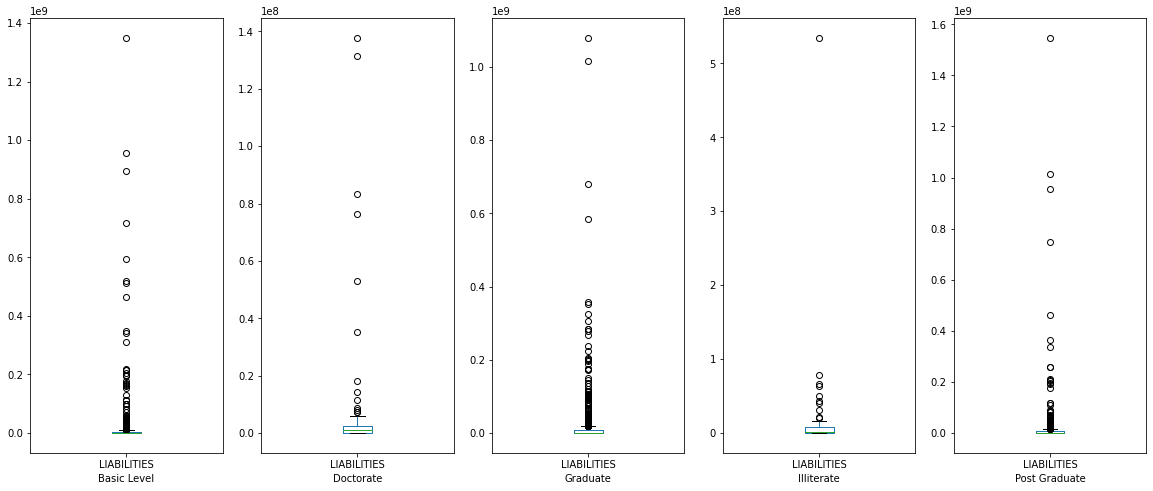

In [15]:
plt.figure(figsize=(20,8))
plt.subplot(1,5,1)
df_lia.get_group('Basic Level').plot(kind = 'box')
plt.xlabel('Basic Level')
plt.subplot(1,5,2)
df_lia.get_group('Doctorate').plot(kind = 'box')
plt.xlabel('Doctorate')
plt.subplot(1,5,3)
df_lia.get_group('Graduate').plot(kind = 'box')
plt.xlabel('Graduate')
plt.subplot(1,5,4)
df_lia.get_group('Illiterate').plot(kind = 'box')
plt.xlabel('Illiterate')
plt.subplot(1,5,5)
df_lia.get_group('Post Graduate').plot(kind = 'box')
plt.xlabel('Post Graduate')

Box plot is the best pictorial presentation to show the outliers. Clearly, both assets and liabilites have outliers across all the education levels.

# 5. On the basis of the descriptive measure of variability, candidates with what education level shows the most and the least inconsistent behavior in the declared assets?

In [16]:
df_asset_des.loc[('CV'), :] = df_asset_des.loc[('std'), :]/df_asset_des.loc[('mean'), :]
df_asset_des

EDUCATION,Basic Level,Doctorate,Graduate,Illiterate,Post Graduate
count,588.00,73.00,776.00,55.00,503.00
mean,113087357.14,163789131.21,147467337.18,124500820.24,130823318.28
std,339566599.54,470070948.95,478087455.58,232219087.71,394944020.12
min,565.00,177000.00,0.00,0.00,0.00
25%,3000851.00,9770000.00,9909171.25,7262786.00,7944132.00
50%,14935796.50,18988281.00,33282304.00,28350217.00,27182370.00
75%,65860366.50,74274036.00,115810559.75,116754959.00,92760397.50
max,3418643970.00,2508270292.00,8950179170.00,1197313405.00,4174930444.00
Total,66495365996.00,11956606578.00,114434653649.00,6847545113.00,65804129095.00
CV,3.00,2.87,3.24,1.87,3.02


From the above table, we can say that, Illiterate candidates show the least inconsistent behavior in the declared assets as the coefficient of variation is the lowest for it. On the other hand, Graduate candidates show the most inconsistent behavior in the declared assets as the CV is the highest.